In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "return_predictability_data.csv"  # Adjust path as needed
data = pd.read_csv(file_path)

# Categorical and Numerical Columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical Columns: {list(categorical_cols)}")
print(f"Numerical Columns: {list(numerical_cols)}")

# Categorizing features
macro_features = [col for col in numerical_cols if col.startswith('macro_')]
firm_features = [col for col in numerical_cols if col not in macro_features and col != 'risk_premium']

print("\nMacro Features:", macro_features)
print("\nFirm-Specific Features:", firm_features)
print("\nCategorical Features:", categorical_cols)

# Initial Overview of the Dataset
print("\nDataset Overview:")
print(data.info())

print("\nFirst 5 Rows:")
print(data.head())

# Summary Statistics
print("\nSummary Statistics for Macro Features:")
print(data[macro_features].describe())

print("\nSummary Statistics for Firm-Specific Features:")
print(data[firm_features].describe())



Categorical Columns: ['DATE', 'sic2', 'name']
Numerical Columns: ['permno', 'mvel1', 'beta', 'betasq', 'chmom', 'dolvol', 'idiovol', 'indmom', 'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay', 'turn', 'absacc', 'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr', 'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind', 'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured', 'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash', 'chtx', 'cinvest', 'ear', 'nincr', 'roaq', 'roavol', 'roeq', 'rsup', 'stdacc', 'stdcf', 'ms', 'baspread', 'ill', 'maxret', 'retvol', 'std_dolvol', 'std_turn', 'zerotrade', 'r

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of risk_premium
plt.figure(figsize=(10, 6))
sns.histplot(data['risk_premium'], kde=True, bins=30, color='blue')
plt.title("Distribution of Risk Premium", fontsize=16)
plt.xlabel("Risk Premium", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [22]:
# Missing Data Analysis
def categorize_missing_data(data):
    missing_data = data.isnull().sum()
    missing_percentage = (missing_data / len(data)) * 100

    # Define categories for missing percentages
    def categorize(percentage):
        if percentage == 0:
            return '0% (No Missing Data)'
        elif percentage <= 20:
            return '0-20% (Low Missing Data)'
        elif percentage <= 35:
            return '20-35% (Moderate Missing Data)'
        elif percentage <= 50:
            return '35-50% (Significant Missing Data)'
        elif percentage <= 80:
            return '50-80% (High Missing Data)'
        else:
            return '80-100% (Very High Missing Data)'

    # Apply categorization
    missing_categories = missing_percentage.apply(categorize)

    # Combine into a DataFrame
    missing_df = pd.DataFrame({
        'Missing Values': missing_data,
        'Percentage': missing_percentage,
        'Category': missing_categories
    })

    return missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

# Categorize missing data
missing_data_summary = categorize_missing_data(data)
print("\nCategorized Missing Data:")
print(missing_data_summary.tail(60))




Categorized Missing Data:
               Missing Values  Percentage                        Category
operprof              1382965   33.814069  20-35% (Moderate Missing Data)
tb                    1376417   33.653968  20-35% (Moderate Missing Data)
chinv                 1345615   32.900846  20-35% (Moderate Missing Data)
cfp                   1338036   32.715537  20-35% (Moderate Missing Data)
cfp_ia                1338036   32.715537  20-35% (Moderate Missing Data)
chpmia                1309264   32.012049  20-35% (Moderate Missing Data)
pchgm_pchsale         1304215   31.888599  20-35% (Moderate Missing Data)
sgr                   1303238   31.864711  20-35% (Moderate Missing Data)
chempia               1299762   31.779721  20-35% (Moderate Missing Data)
hire                  1299762   31.779721  20-35% (Moderate Missing Data)
egr                   1286721   31.460863  20-35% (Moderate Missing Data)
lgr                   1273837   31.145844  20-35% (Moderate Missing Data)
gma        

/tmp/ipykernel_63146/4144607919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_category_counts.index, y=missing_data_category_counts.values, palette="viridis")


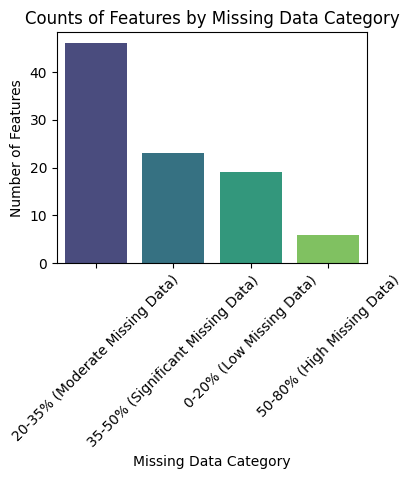

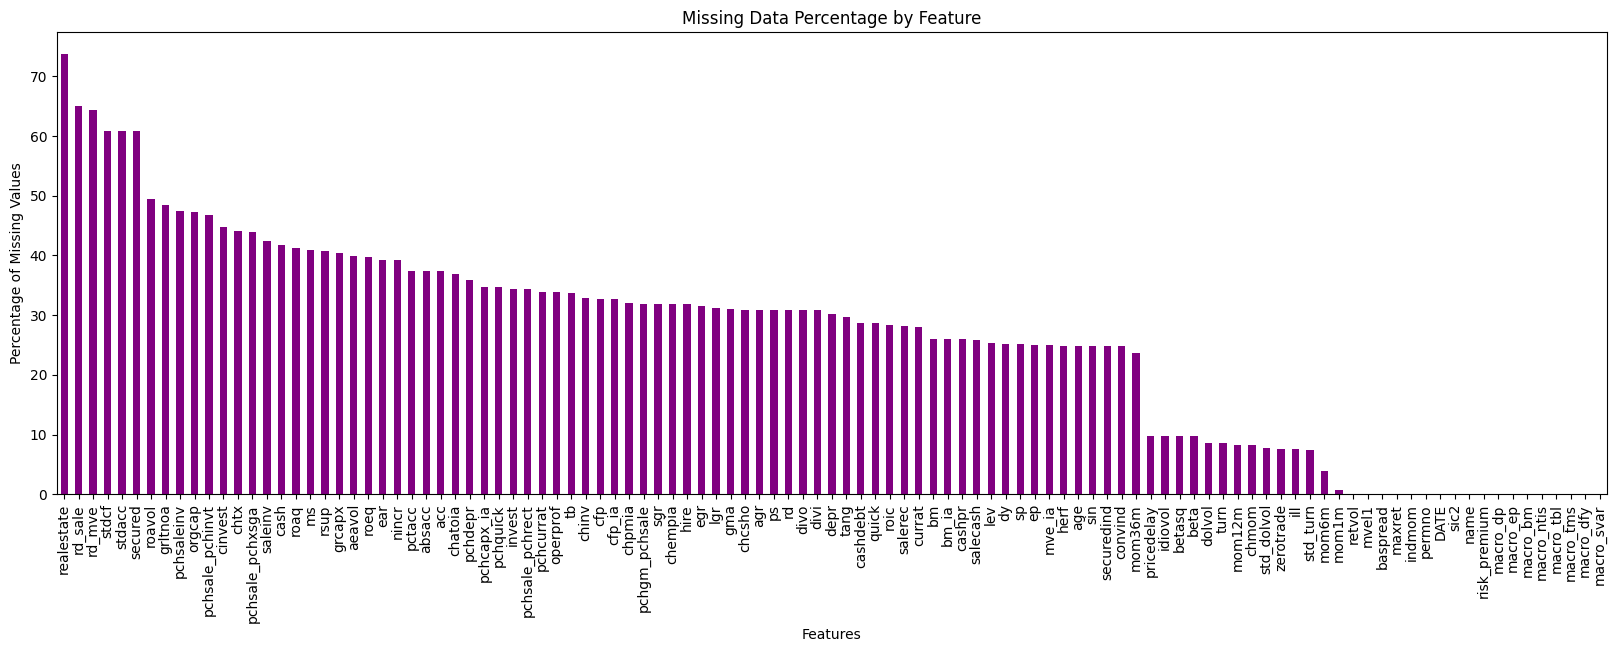

In [14]:
# Visualize missing data by category
missing_data_category_counts = missing_data_summary['Category'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=missing_data_category_counts.index, y=missing_data_category_counts.values, palette="viridis")
plt.title("Counts of Features by Missing Data Category")
plt.xlabel("Missing Data Category")
plt.ylabel("Number of Features")
plt.xticks(rotation=45)
plt.show()

# Aggregate missing data by columns
missing_summary = data.isnull().sum() / len(data) * 100
missing_summary.sort_values(ascending=False).plot(kind='bar', figsize=(20, 6), color='purple')
plt.title("Missing Data Percentage by Feature")
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.show()


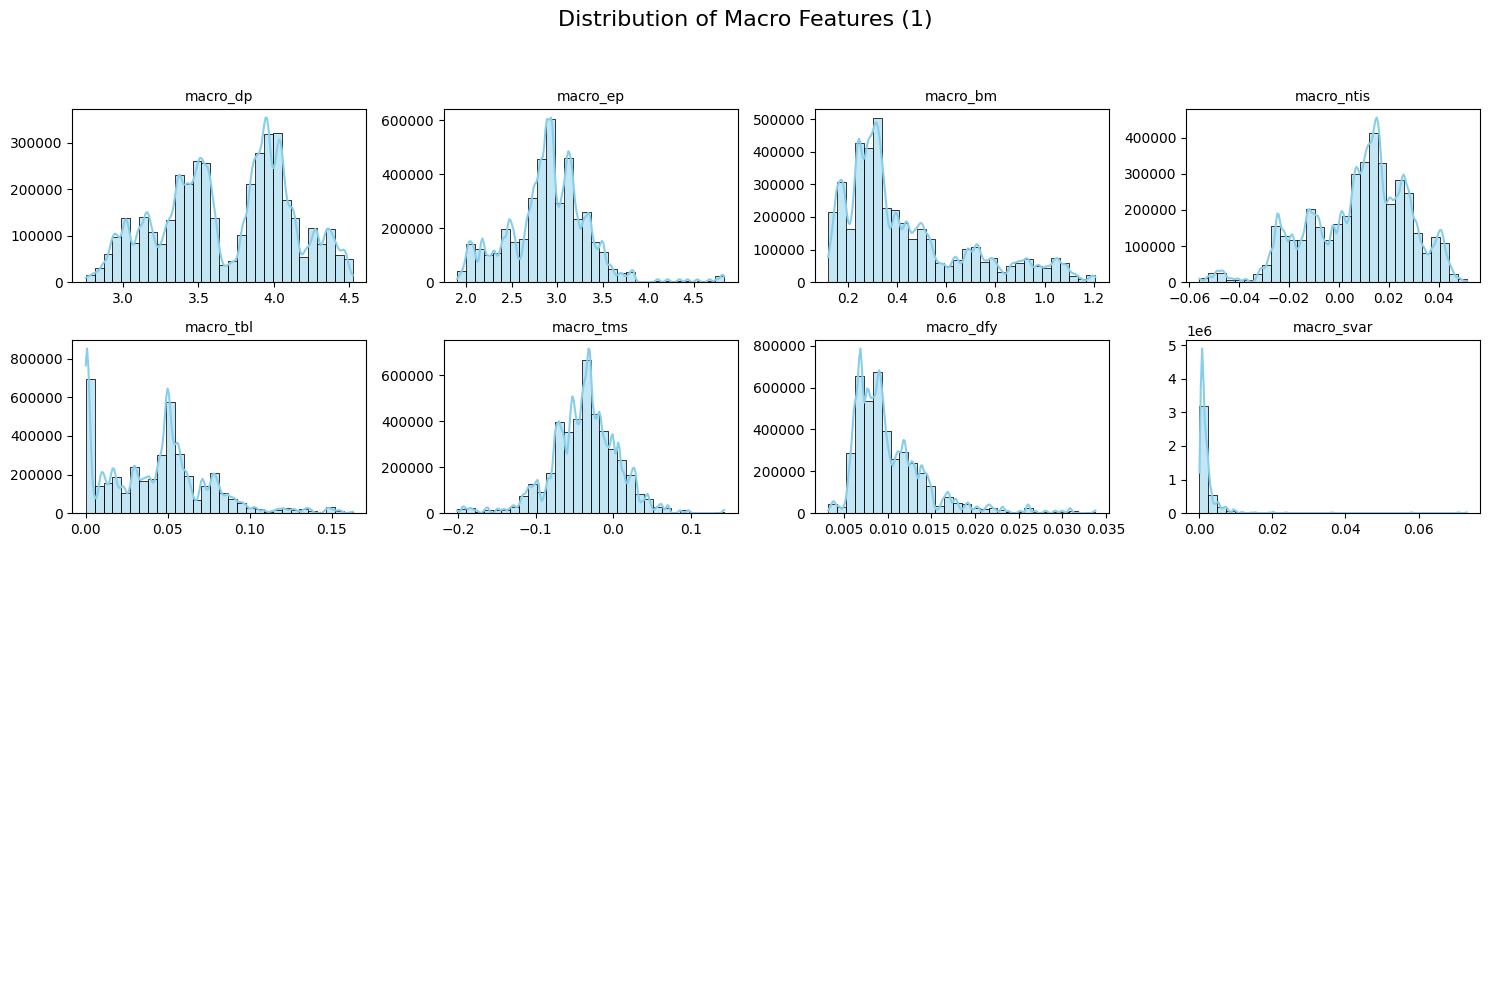

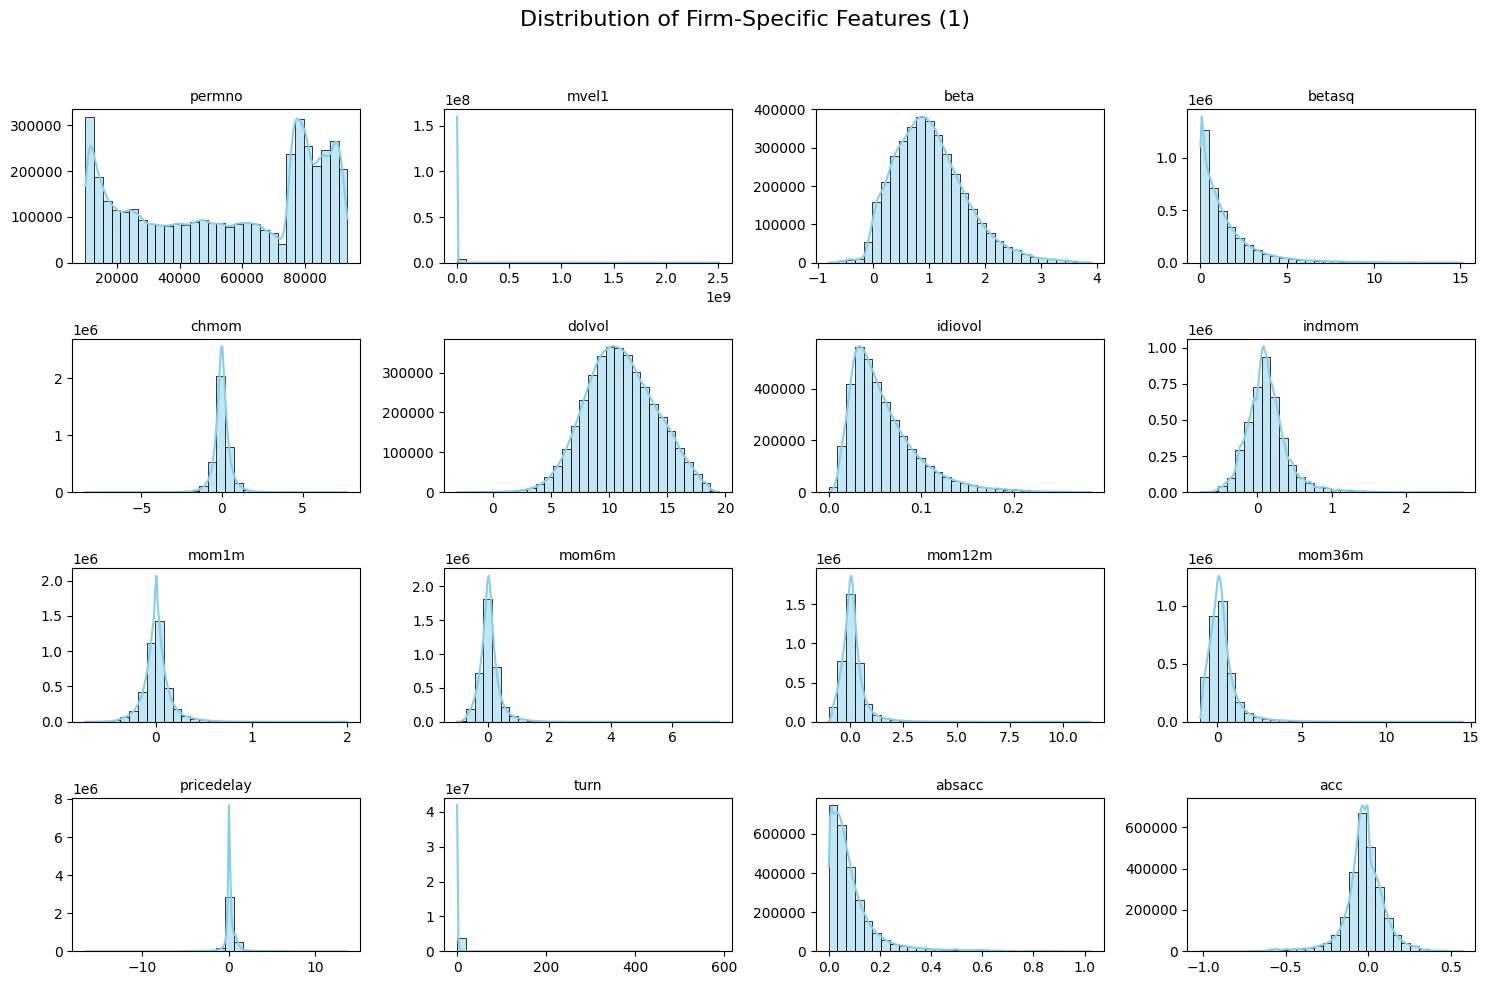

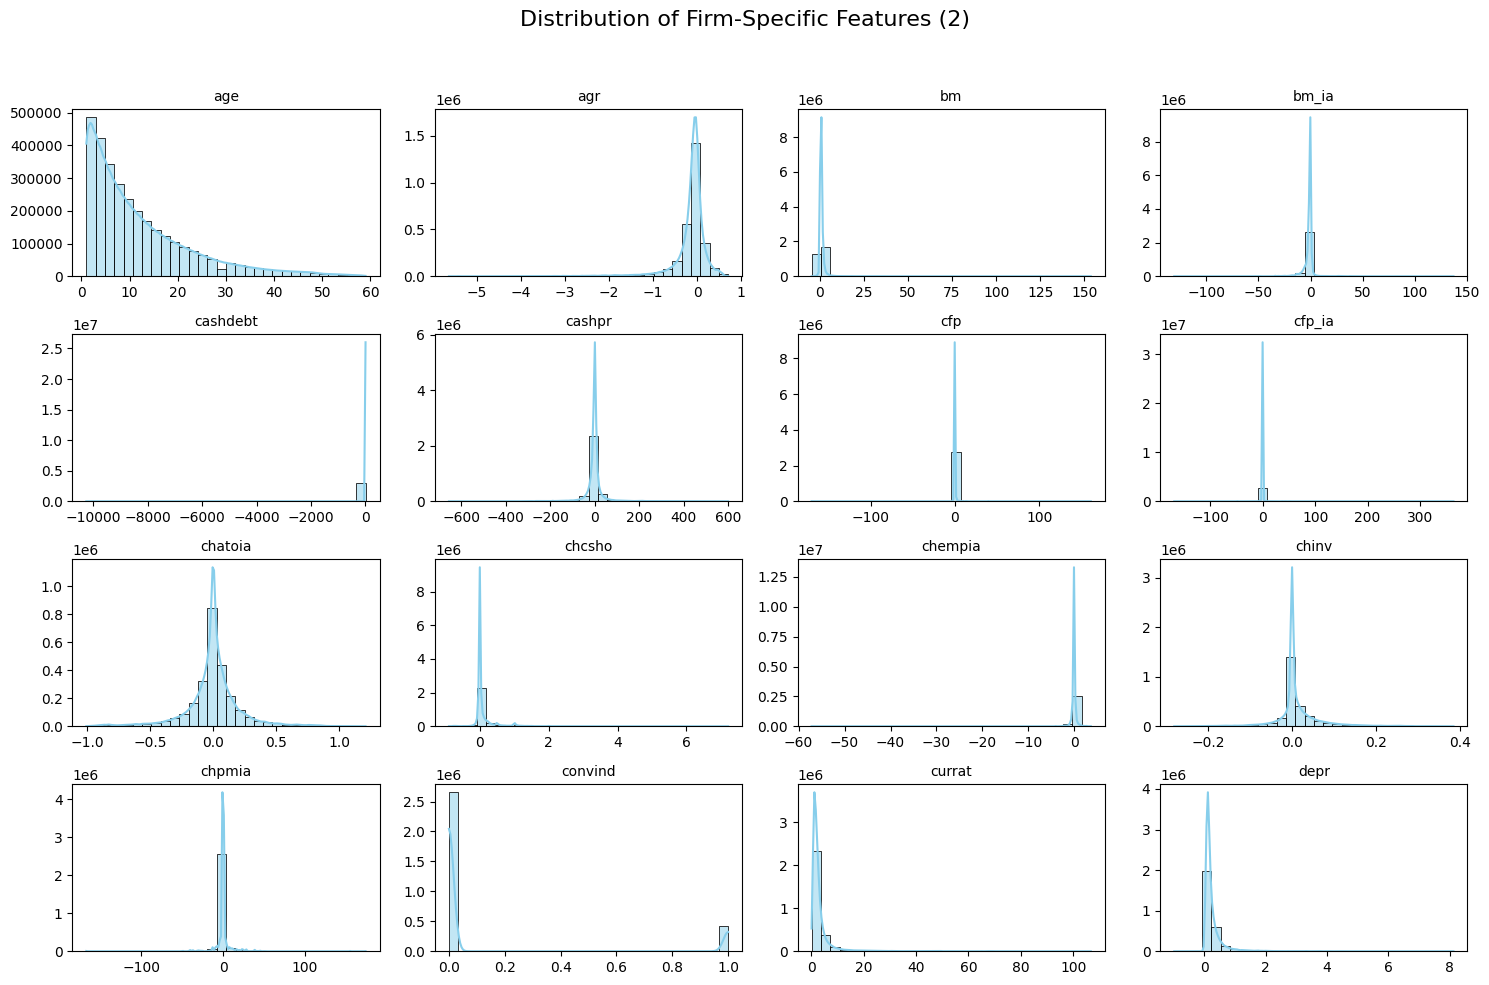

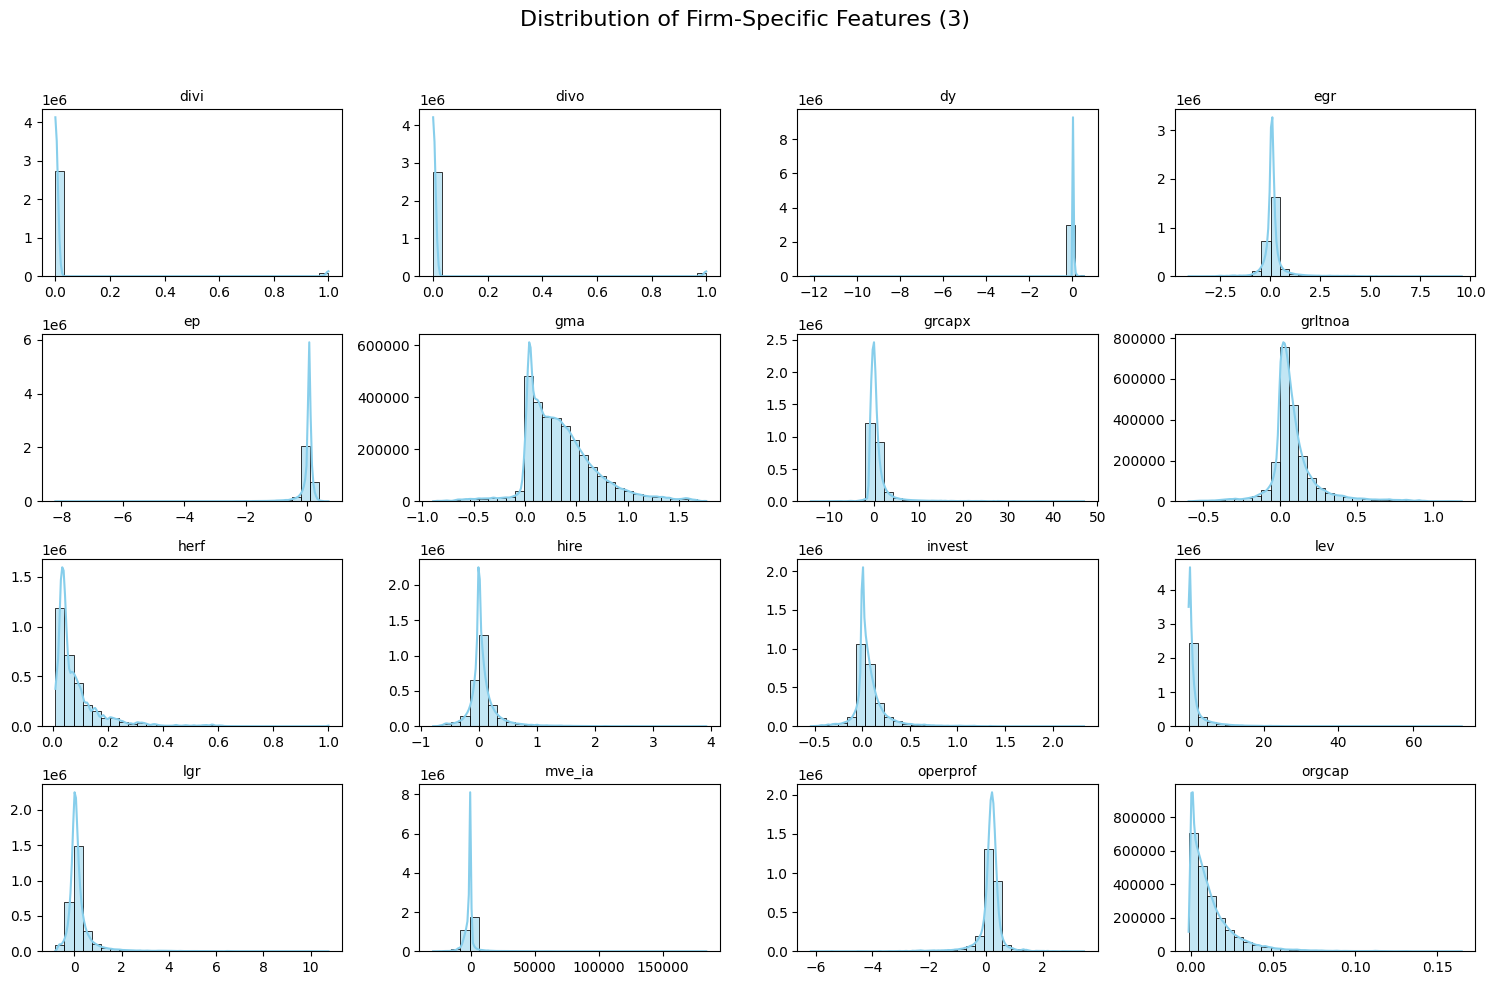

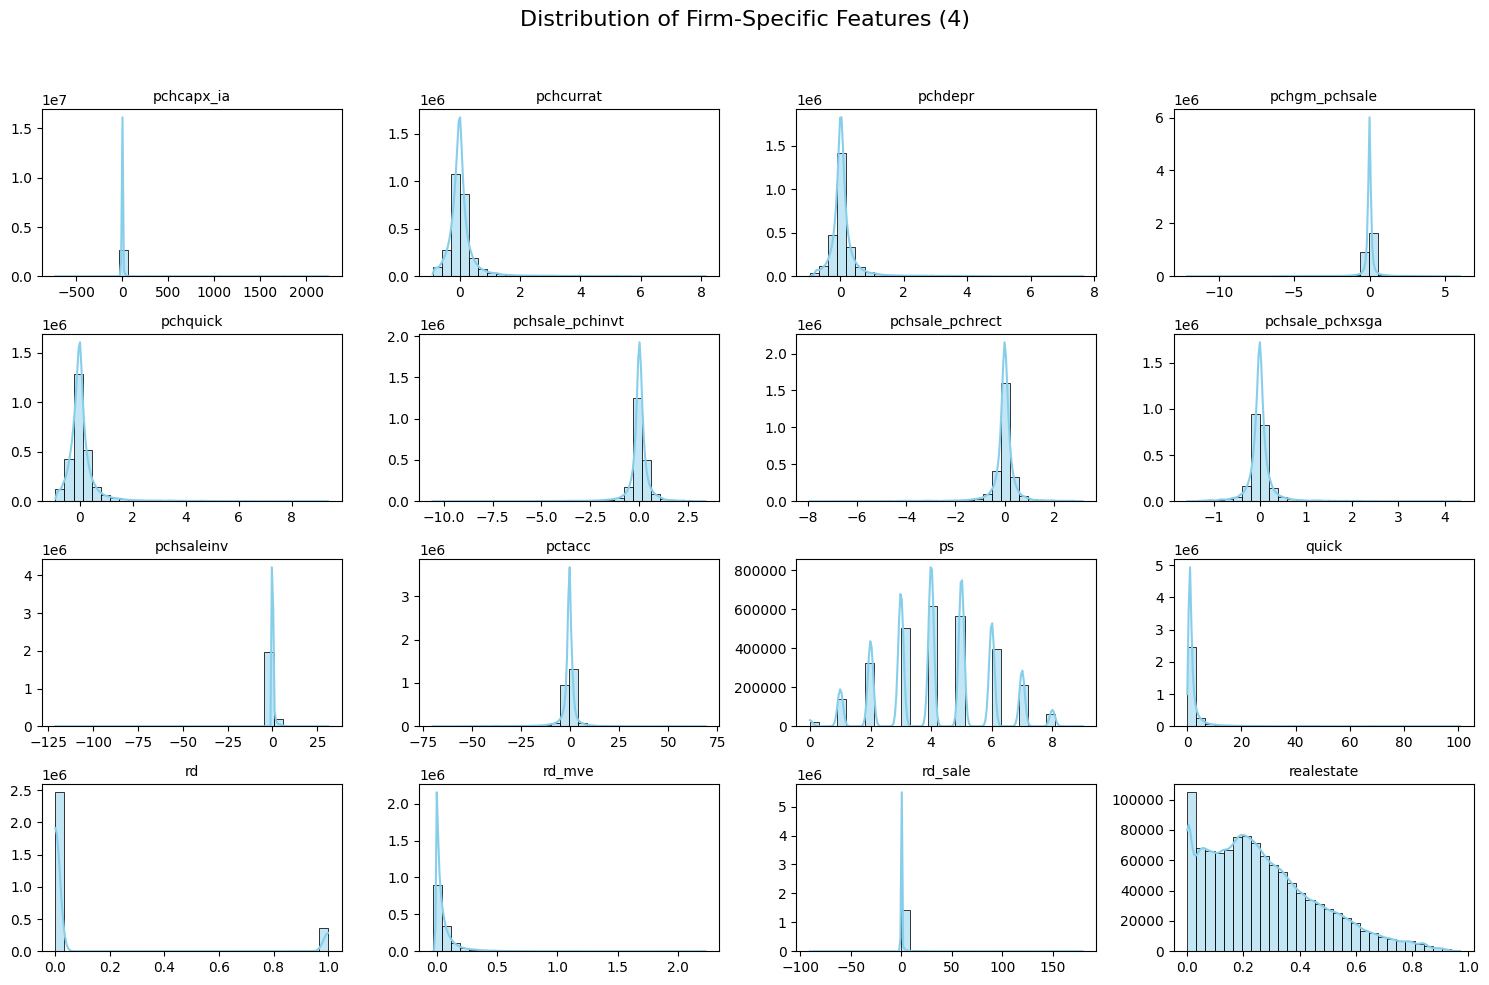

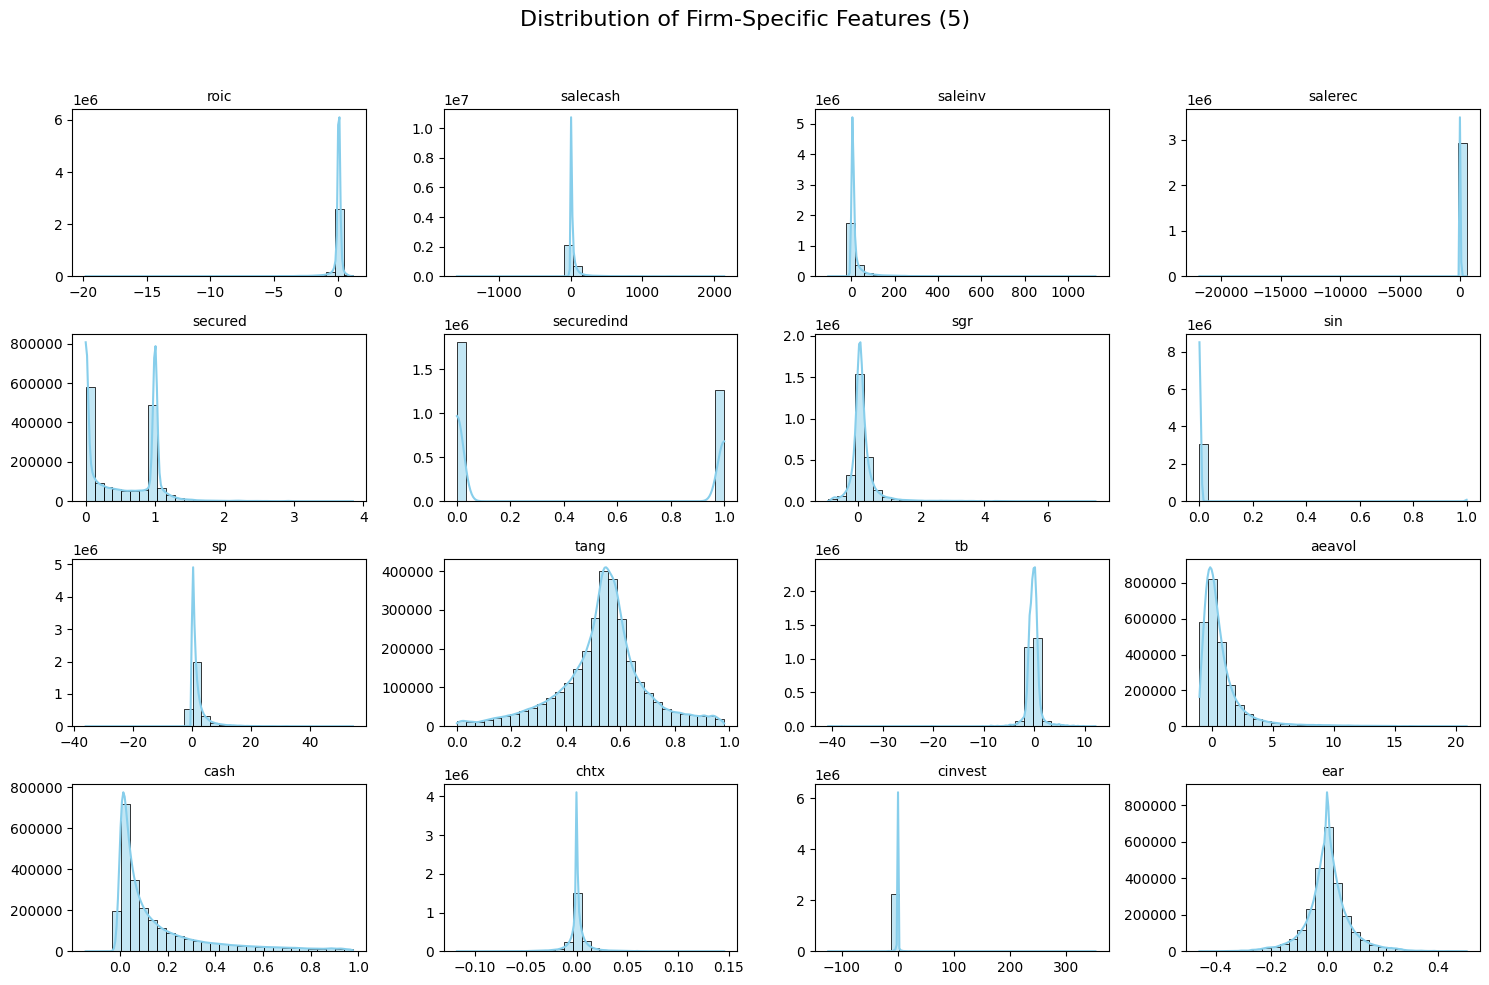

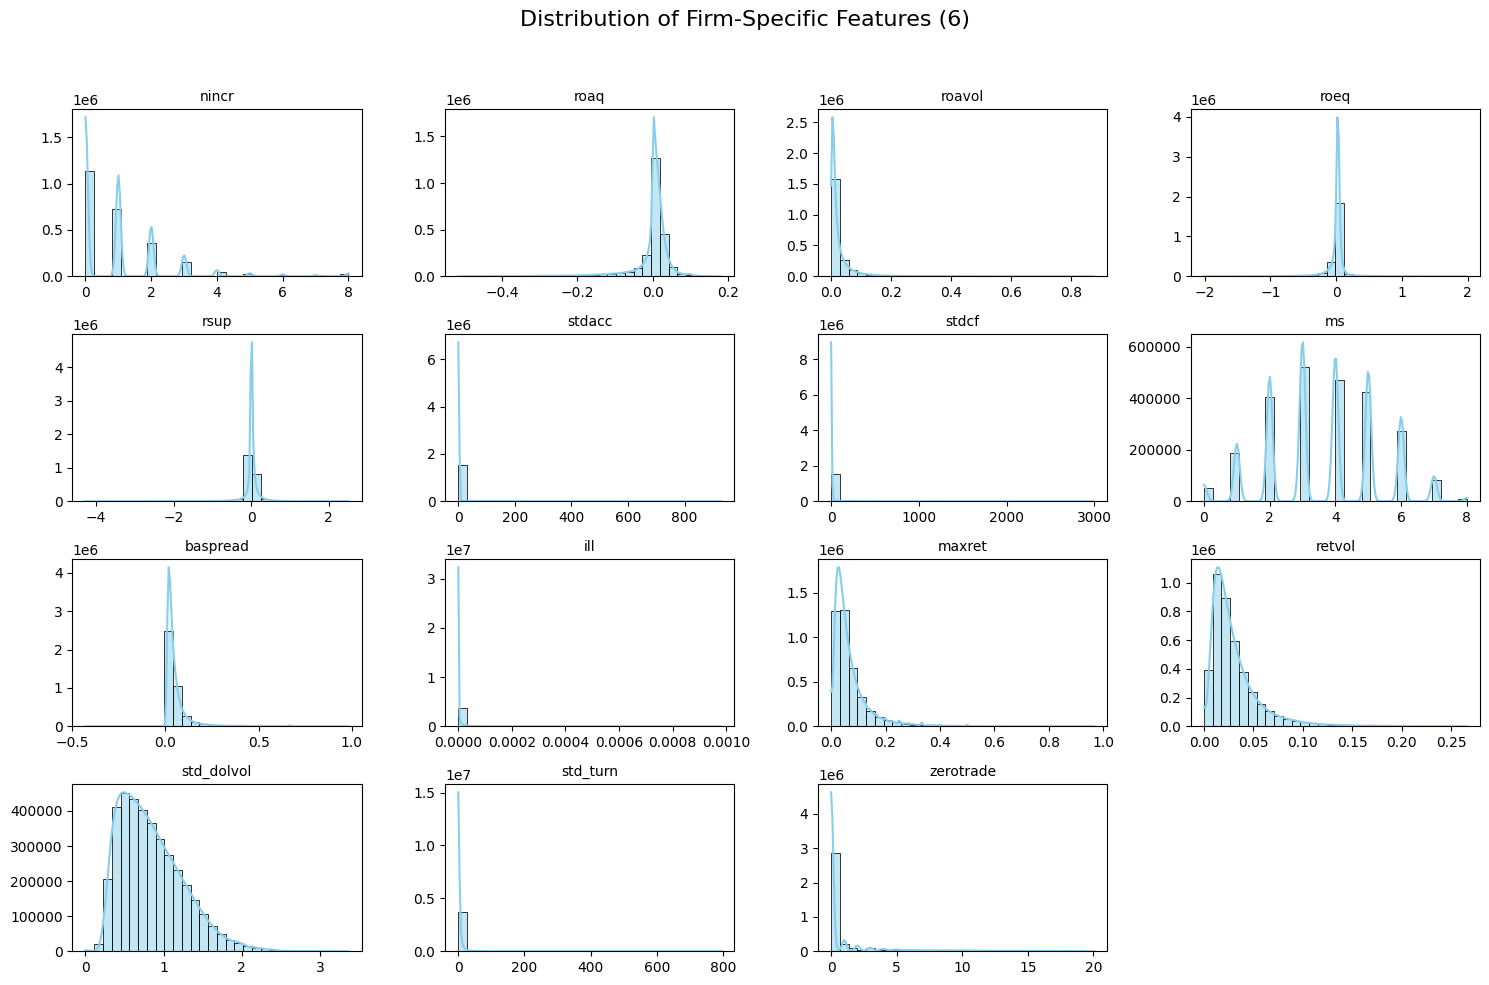

In [2]:
# Compact distribution visualization for numerical features
def plot_feature_distributions(data, features, group_name, rows=5, cols=4):
    """
    Plot feature distributions in a grid layout.
    
    Args:
        data (DataFrame): The dataset.
        features (list): List of features to plot.
        group_name (str): Group name for the title (e.g., "Macro Features").
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
    """
    grid_size = rows * cols
    num_features = len(features)
    
    # Iterate through the features in chunks of grid_size
    for start in range(0, num_features, grid_size):
        feature_subset = features[start:start + grid_size]
        
        # Create subplots
        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        axes = axes.flatten()
        
        # Plot each feature in the current subset
        for i, col in enumerate(feature_subset):
            sns.histplot(data[col].dropna(), kde=True, bins=30, ax=axes[i], color="skyblue")
            axes[i].set_title(col, fontsize=10)
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
        
        # Hide any unused subplots
        for j in range(len(feature_subset), len(axes)):
            axes[j].axis('off')
        
        # Adjust layout and display
        plt.suptitle(f"Distribution of {group_name} ({start // grid_size + 1})", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Plot distributions for macro and firm-specific features
plot_feature_distributions(data, macro_features, "Macro Features", rows=4, cols=4)
plot_feature_distributions(data, firm_features, "Firm-Specific Features", rows=4, cols=4)


In [ ]:
# Outlier Detection Summary
print("\nOutlier Detection:")
for col in macro_features + firm_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected.")


Outlier Detection:
macro_dp: 0 outliers detected.
macro_ep: 78401 outliers detected.
macro_bm: 228903 outliers detected.
macro_ntis: 25929 outliers detected.
macro_tbl: 91443 outliers detected.
macro_tms: 117259 outliers detected.
macro_dfy: 187939 outliers detected.
macro_svar: 417504 outliers detected.
permno: 0 outliers detected.
mvel1: 609240 outliers detected.
beta: 67220 outliers detected.
betasq: 231467 outliers detected.
chmom: 271425 outliers detected.
dolvol: 8412 outliers detected.
idiovol: 150209 outliers detected.
indmom: 168186 outliers detected.
mom1m: 324345 outliers detected.
mom6m: 241758 outliers detected.
mom12m: 188001 outliers detected.
mom36m: 171595 outliers detected.
pricedelay: 574835 outliers detected.
turn: 319574 outliers detected.
absacc: 168374 outliers detected.
acc: 171148 outliers detected.
age: 132640 outliers detected.
agr: 315476 outliers detected.
bm: 242444 outliers detected.
bm_ia: 446210 outliers detected.
cashdebt: 467930 outliers detected.
ca

In [7]:
# Correlation Analysis (Target and Features)
target_corr = data[numerical_cols].corr()['risk_premium'].sort_values(ascending=False)
print("\nCorrelation of Features with Risk Premium:")
print(target_corr.head(50))



Correlation of Features with Risk Premium:
risk_premium       1.000000
macro_ep           0.140876
macro_tms          0.127578
macro_dp           0.121815
age                0.046686
rd_mve             0.045045
dolvol             0.043272
ps                 0.041618
depr               0.034806
permno             0.033746
agr                0.032918
cash               0.027657
roavol             0.027124
securedind         0.025137
ms                 0.023749
retvol             0.023659
std_turn           0.022342
rd                 0.019325
saleinv            0.018600
turn               0.016348
idiovol            0.015807
maxret             0.015467
ill                0.015164
mvel1              0.014932
stdcf              0.013933
stdacc             0.013905
quick              0.013577
bm                 0.011392
currat             0.010201
aeavol             0.010120
lev                0.009831
rd_sale            0.009322
pchcapx_ia         0.009155
ear                0.007528
pchs

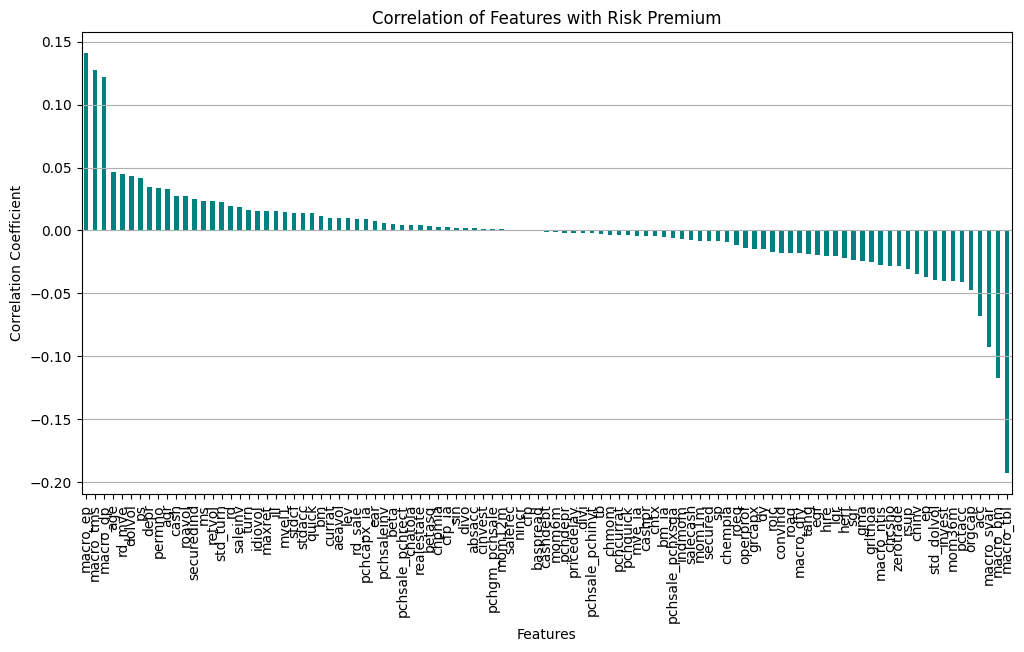

In [8]:
# Top Features Correlation Bar Plot
plt.figure(figsize=(12, 6))
target_corr.drop('risk_premium').plot(kind='bar', color='teal')
plt.title("Correlation of Features with Risk Premium")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

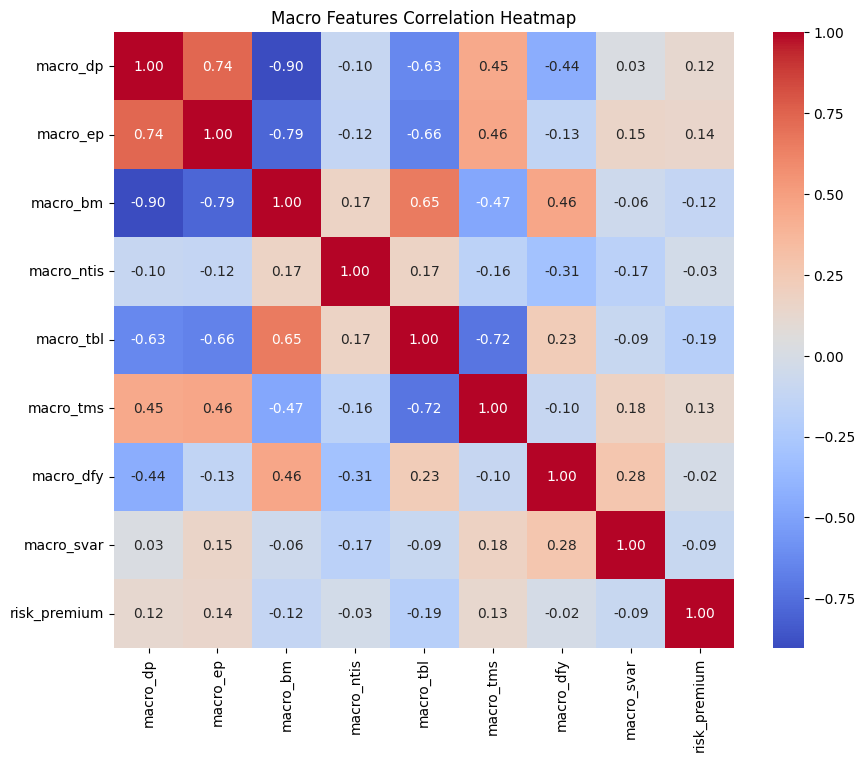

In [4]:
# Assuming macro_features contains the names of macro features
plt.figure(figsize=(10, 8))
# Add 'risk_premium' to the macro_features list for correlation computation
correlation_data = data[macro_features + ['risk_premium']].corr()
sns.heatmap(correlation_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macro Features Correlation Heatmap")
plt.show()


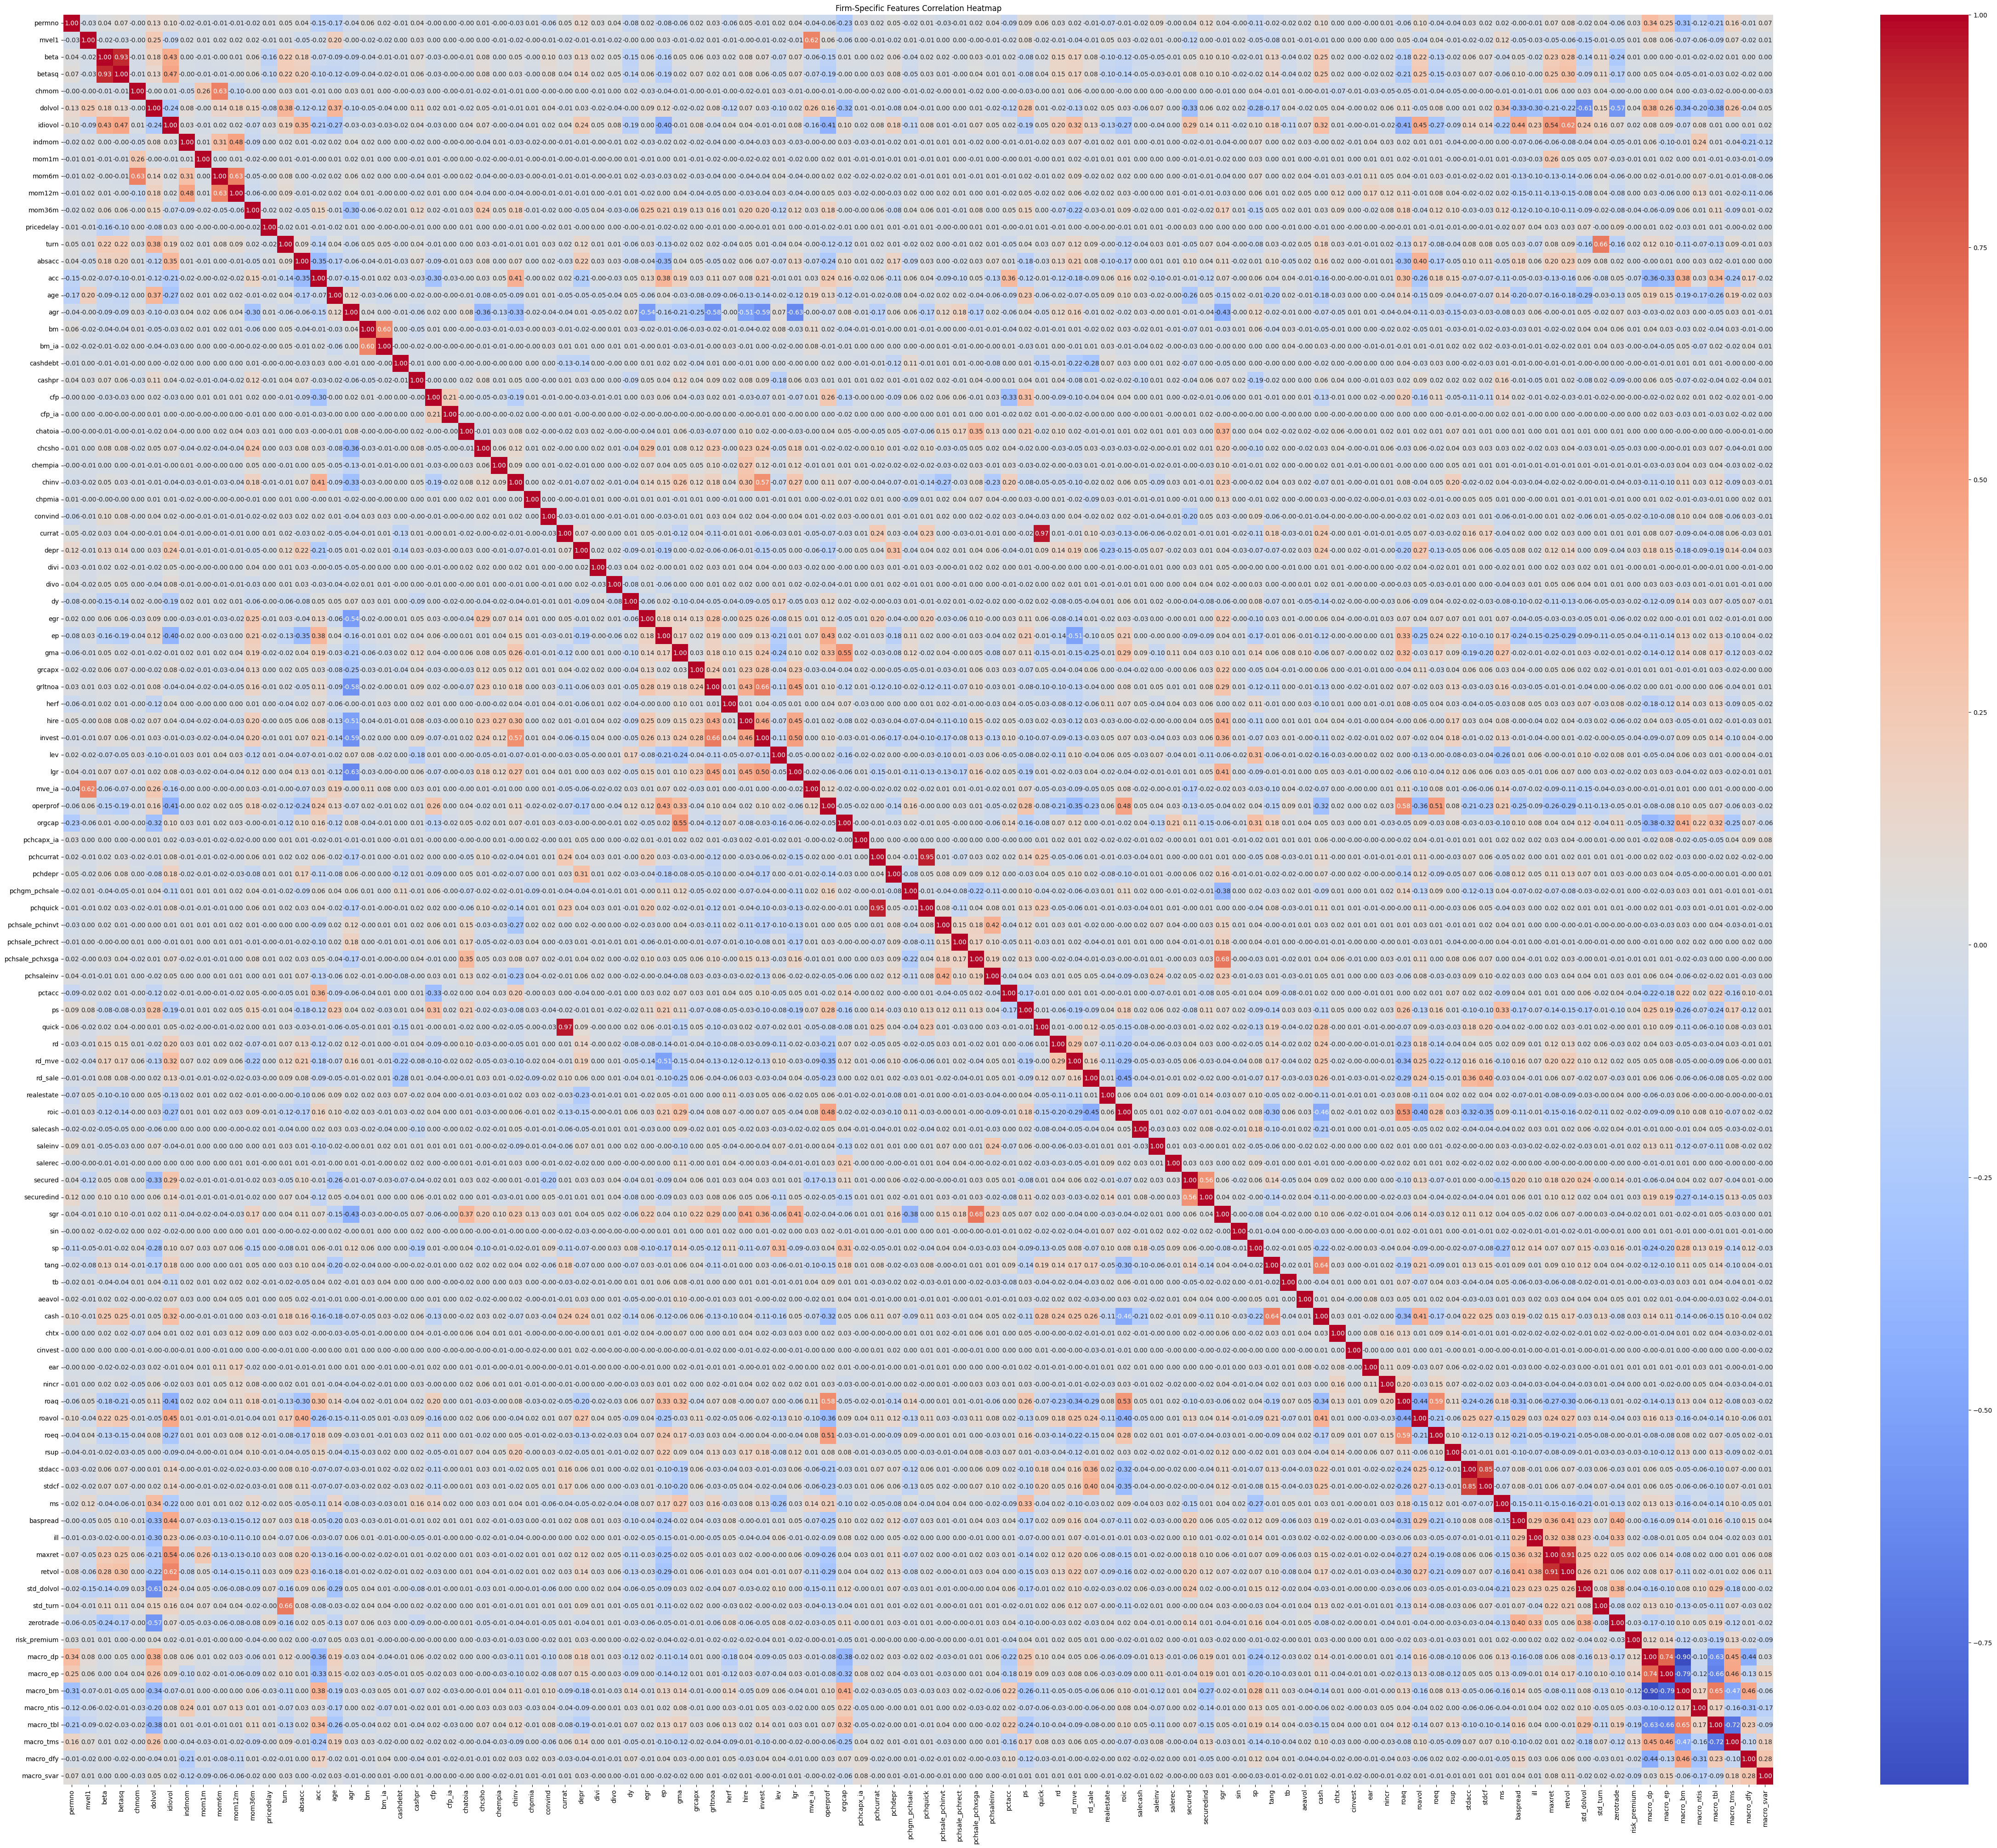

In [2]:
# Heatmap for Firm-Specific Features Correlation
plt.figure(figsize=(60, 50))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Firm-Specific Features Correlation Heatmap")
plt.show()


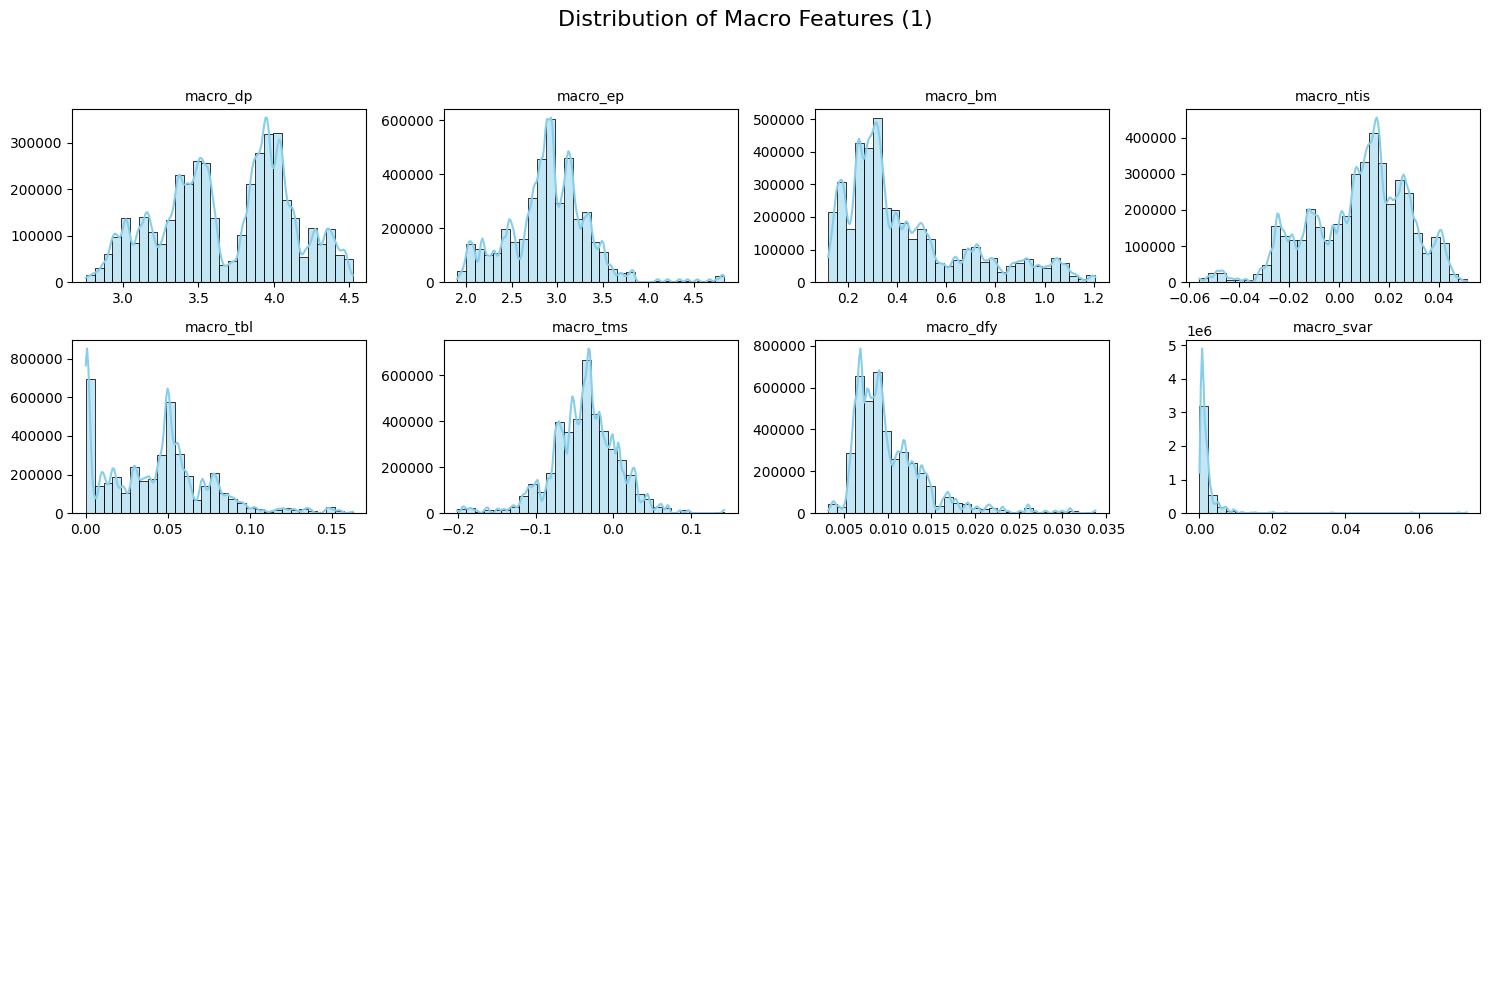

KeyboardInterrupt: 

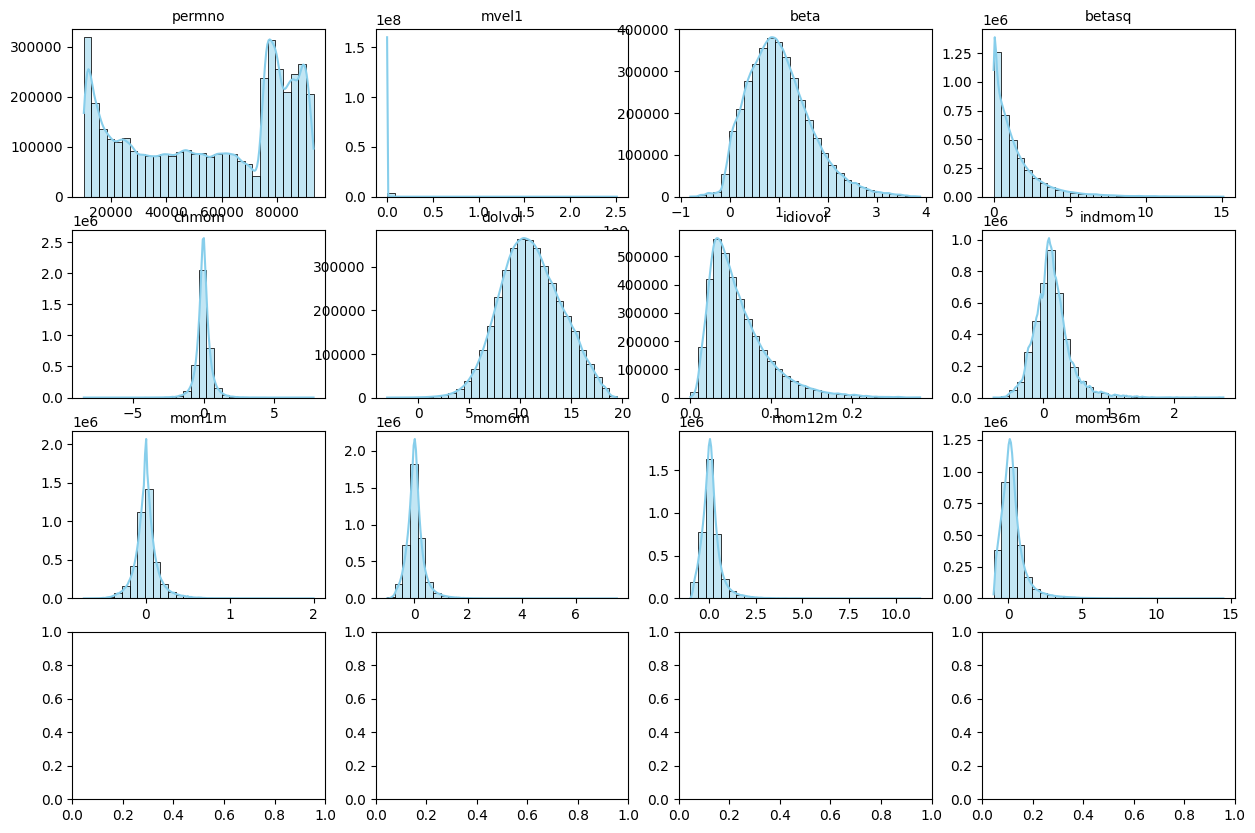

In [23]:
# def plot_boxplots_seaborn(data, features, group_name, cols=4):
#     """
#     Plot boxplots for numerical features using Seaborn's FacetGrid for compact visualization.
    
#     Args:
#         data (DataFrame): The dataset.
#         features (list): List of features to plot.
#         group_name (str): Group name for the title (e.g., "Macro Features").
#         cols (int): Number of columns in the grid.
#     """
#     # Melt the data for Seaborn's FacetGrid
#     melted_data = data[features].melt(var_name="Feature", value_name="Value")
    
#     # Create FacetGrid
#     g = sns.FacetGrid(melted_data, col="Feature", col_wrap=cols, sharex=False, sharey=False, height=3.5)
#     g.map(sns.boxplot, "Value", color="skyblue")
#     g.set_titles("{col_name}")
#     g.fig.subplots_adjust(top=0.9)  # Adjust top spacing for the title
#     g.fig.suptitle(f"Boxplots of {group_name}", fontsize=16)
#     plt.show()

# # Plot boxplots for macro and firm-specific features
# plot_boxplots_seaborn(data, macro_features, "Macro Features", cols=4)
# plot_boxplots_seaborn(data, firm_features, "Firm-Specific Features", cols=4)


# Compact distribution visualization for numerical features
def plot_feature_distributions(data, features, group_name, rows=5, cols=4):
    """
    Plot feature distributions in a grid layout.
    
    Args:
        data (DataFrame): The dataset.
        features (list): List of features to plot.
        group_name (str): Group name for the title (e.g., "Macro Features").
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
    """
    grid_size = rows * cols
    num_features = len(features)
    
    # Iterate through the features in chunks of grid_size
    for start in range(0, num_features, grid_size):
        feature_subset = features[start:start + grid_size]
        
        # Create subplots
        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        axes = axes.flatten()
        
        # Plot each feature in the current subset
        for i, col in enumerate(feature_subset):
            sns.histplot(data[col].dropna(), kde=True, bins=30, ax=axes[i], color="skyblue")
            axes[i].set_title(col, fontsize=10)
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
        
        # Hide any unused subplots
        for j in range(len(feature_subset), len(axes)):
            axes[j].axis('off')
        
        # Adjust layout and display
        plt.suptitle(f"Distribution of {group_name} ({start // grid_size + 1})", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Plot distributions for macro and firm-specific features
plot_feature_distributions(data, macro_features, "Macro Features", rows=4, cols=4)
plot_feature_distributions(data, firm_features, "Firm-Specific Features", rows=4, cols=4)


Correlation of Features with Risk Premium:
risk_premium    1.000000
macro_ep        0.140876
macro_tms       0.127578
macro_dp        0.121815
age             0.046686
                  ...   
orgcap         -0.047192
acc            -0.068050
macro_svar     -0.092787
macro_bm       -0.117577
macro_tbl      -0.192919
Name: risk_premium, Length: 104, dtype: float64


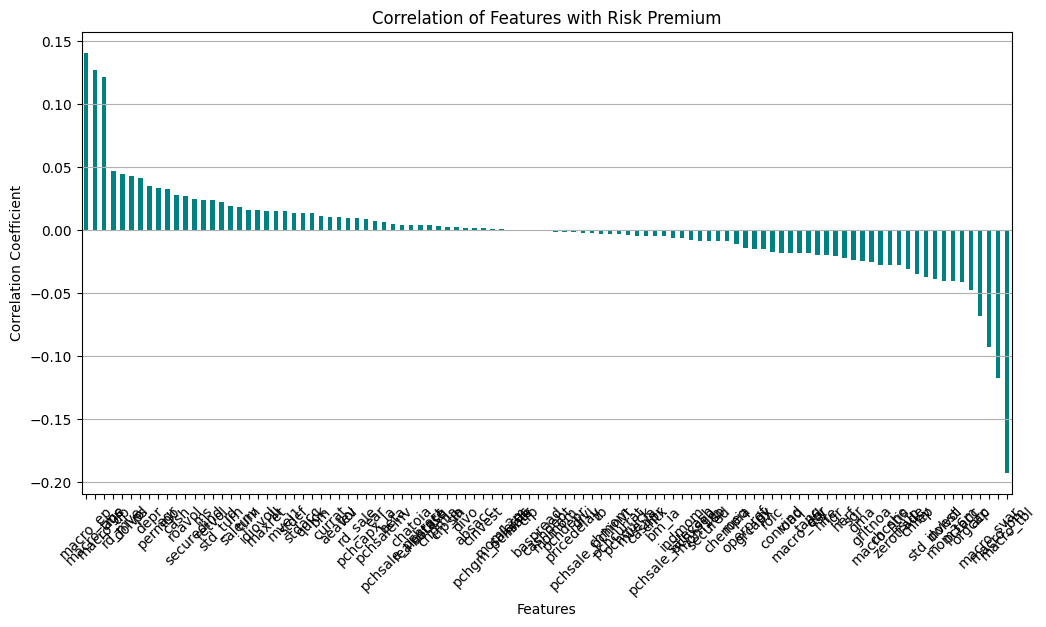

In [ ]:

# Pairplot for Selected Features and Target
selected_features = target_corr.drop('risk_premium').nlargest(5).index  # Top 5 correlated features
sns.pairplot(data, vars=selected_features, hue='risk_premium', palette="husl")
plt.show()



In [ ]:

# Define the regression features with the most correlated predictors
regression_features = {
    'grltnoa': ['invest', 'agr'],
    'pchsaleinv': ['pchsale_pchinvt', 'saleinv'],
    'pchsale_pchinvt': ['pchsaleinv', 'chinv'],
    'roeq': ['roaq', 'operprof'],
    'acc': ['chinv', 'macro_bm']
}

# Regression Imputation Function
def regression_impute(df, target, predictors):
    non_missing = df[df[target].notnull()]
    missing = df[df[target].isnull()]
    
    model = LinearRegression()
    model.fit(non_missing[predictors], non_missing[target])
    df.loc[missing.index, target] = model.predict(missing[predictors])
    return df

# Apply regression imputation for the specified features
for target, predictors in regression_features.items():
    data = regression_impute(data, target, predictors)

# Save the imputed dataset
data.to_csv('cleaned_dataset.csv', index=False)


In [24]:
# Define the selected features
features = [
    'pricedelay',    # Price delay
    'betasq',        # Beta squared
    'idiovol',       # Idiosyncratic volatility
    'beta',          # Beta (market risk measure)
    'dolvol',        # Dollar volume
    'turn',          # Turnover ratio
    'chmom',         # Change in momentum
    'mom12m',        # 12-month momentum
    'std_dolvol',    # Standard deviation of dollar volume
    'zerotrade',     # Zero trade days
    'ill',           # Illiquidity measure
    'std_turn',      # Standard deviation of turnover
    'mom6m',         # 6-month momentum
    'mom1m',         # 1-month momentum
    'retvol',        # Return volatility
    'mvel1',         # Market value of equity (lagged 1 period)
    'baspread',      # Bid-ask spread
    'maxret',        # Maximum return
    'indmom'         # Industry momentum
]

for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected.")

pricedelay: 574835 outliers detected.
betasq: 231467 outliers detected.
idiovol: 150209 outliers detected.
beta: 67220 outliers detected.
dolvol: 8412 outliers detected.
turn: 319574 outliers detected.
chmom: 271425 outliers detected.
mom12m: 188001 outliers detected.
std_dolvol: 52489 outliers detected.
zerotrade: 931831 outliers detected.
ill: 633083 outliers detected.
std_turn: 383023 outliers detected.
mom6m: 241758 outliers detected.
mom1m: 324345 outliers detected.
retvol: 245800 outliers detected.
mvel1: 609240 outliers detected.
baspread: 340408 outliers detected.
maxret: 287625 outliers detected.
indmom: 168186 outliers detected.
